In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer 
from sklearn.compose import ColumnTransformer

In [2]:
df = pd.read_csv('titanic_toy.csv')

In [3]:
df.head()

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0


In [4]:
df.shape

(891, 4)

In [5]:
df.isnull().mean()*100

Age         19.865320
Fare         5.050505
Family       0.000000
Survived     0.000000
dtype: float64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       714 non-null    float64
 1   Fare      846 non-null    float64
 2   Family    891 non-null    int64  
 3   Survived  891 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 28.0 KB


In [7]:
df.describe()

,Age,Fare,Family,Survived
count,714.000000,846.000000,891.000000,891.000000
mean,29.699118,32.279338,0.904602,0.383838
std,14.526497,50.305796,1.613459,0.486592
min,0.420000,0.000000,0.000000,0.000000
25%,20.125000,7.895800,0.000000,0.000000
50%,28.000000,14.454200,0.000000,0.000000
75%,38.000000,31.206250,1.000000,1.000000
max,80.000000,512.329200,10.000000,1.000000


In [9]:
X = df.drop('Survived',axis = 1)
y = df['Survived']

In [10]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [11]:
X_train

,Age,Fare,Family
30,40.0,27.7208,0
10,4.0,16.7000,2
873,47.0,9.0000,0
182,9.0,31.3875,6
876,20.0,9.8458,0
...,...,...,...
534,30.0,8.6625,0
584,NaN,8.7125,0
493,71.0,49.5042,0
527,NaN,221.7792,0


In [13]:
X_train.shape,X_test.shape

((712, 3), (179, 3))

In [14]:
X_train.isnull().mean()*100

Age       20.786517
Fare       5.056180
Family     0.000000
dtype: float64

# Code without SkLearn 


In [15]:
mean_age = X_train["Age"].mean()
median_age = X_train["Age"].median()

mean_fare = X_train['Fare'].mean()
median_fare = X_train['Fare'].median()


In [16]:
X_train['Age_mean'] = X_train['Age'].fillna(mean_age)
X_train['Age_median'] = X_train['Age'].fillna(median_age)

In [17]:
X_train.sample(5)

,Age,Fare,Family,Age_mean,Age_median
782,29.0,30.0000,0,29.000000,29.00
703,25.0,7.7417,0,25.000000,25.00
8,27.0,11.1333,2,27.000000,27.00
648,NaN,7.5500,0,29.785904,28.75
390,36.0,120.0000,3,36.000000,36.00


In [19]:
X_train['Fare_mean'] = X_train['Fare'].fillna(mean_fare)
X_train['Fare_median'] = X_train['Fare'].fillna(median_fare)

In [21]:
X_train.sample(5)

,Age,Fare,Family,Age_mean,Age_median,Fare_mean,Fare_median
771,48.0,7.8542,0,48.000000,48.00,7.8542,7.8542
449,52.0,30.5000,0,52.000000,52.00,30.5000,30.5000
829,62.0,80.0000,0,62.000000,62.00,80.0000,80.0000
456,65.0,26.5500,0,65.000000,65.00,26.5500,26.5500
388,NaN,7.7292,0,29.785904,28.75,7.7292,7.7292


In [26]:
# let's check variance
print("original age variable variance: ",X_train['Age'].var())
print("Age variance after mean imputation : ",X_train['Age_mean'].var())
print("Age variance after median imputation: ",X_train['Age_median'].var())
print('******')
print("original Fare variable variance: ",X_train['Fare'].var())
print("fare variance after mean imputation : ",X_train['Fare_mean'].var())
print("fare variance after median imputation: ",X_train['Fare_median'].var())


original age variable variance:  204.3495133904614
Age variance after mean imputation :  161.81262452718673
Age variance after median imputation:  161.9895663346054
******
original Fare variable variance:  2448.197913706318
fare variance after mean imputation :  2324.2385256705547
fare variance after median imputation:  2340.0910219753637


<function matplotlib.pyplot.show(close=None, block=None)>

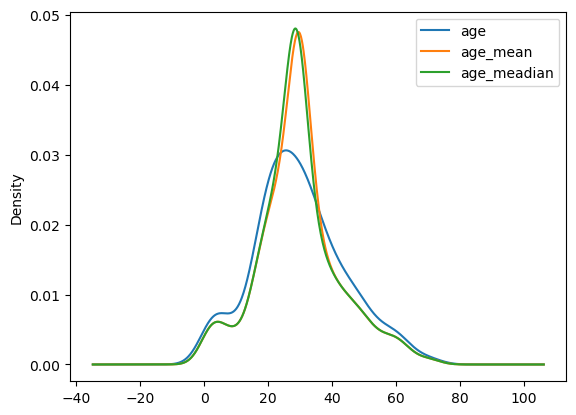

In [33]:
#  let's understand through some graph  
fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution 
X_train['Age'].plot(kind= 'kde',ax = ax,label = 'age')

# variable imputed with mean
X_train['Age_mean'].plot(kind= 'kde',ax = ax,label = 'age_mean')

# variable imputed with median
X_train['Age_median'].plot(kind= 'kde',ax = ax,label = 'age_meadian')

plt.legend()
plt.show

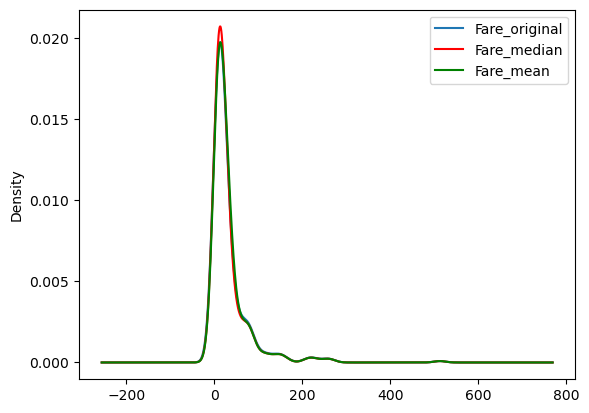

In [35]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
X_train['Fare'].plot(kind='kde', ax=ax,label = 'Fare_original')

# variable imputed with the median
X_train['Fare_median'].plot(kind='kde', ax=ax, color='red',label = 'Fare_median')

# variable imputed with the mean
X_train['Fare_mean'].plot(kind='kde', ax=ax, color='green',label = 'Fare_mean')

plt.legend()
plt.show()

In [36]:
X_train.cov()

,Age,Fare,Family,Age_mean,Age_median,Fare_mean,Fare_median
Age,204.349513,70.719262,-6.498901,204.349513,204.349513,66.665205,64.858859
Fare,70.719262,2448.197914,17.258917,55.603719,57.957599,2448.197914,2448.197914
Family,-6.498901,17.258917,2.735252,-5.146106,-5.112563,16.385048,16.476305
Age_mean,204.349513,55.603719,-5.146106,161.812625,161.812625,52.788341,51.358000
Age_median,204.349513,57.957599,-5.112563,161.812625,161.989566,55.023037,53.553455
Fare_mean,66.665205,2448.197914,16.385048,52.788341,55.023037,2324.238526,2324.238526
Fare_median,64.858859,2448.197914,16.476305,51.358000,53.553455,2324.238526,2340.091022


In [37]:
X_train.corr()

,Age,Fare,Family,Age_mean,Age_median,Fare_mean,Fare_median
Age,1.000000,0.092644,-0.299113,1.000000,1.000000,0.090156,0.087356
Fare,0.092644,1.000000,0.208268,0.088069,0.091757,1.000000,1.000000
Family,-0.299113,0.208268,1.000000,-0.244610,-0.242883,0.205499,0.205942
Age_mean,1.000000,0.088069,-0.244610,1.000000,0.999454,0.086078,0.083461
Age_median,1.000000,0.091757,-0.242883,0.999454,1.000000,0.089673,0.086982
Fare_mean,0.090156,1.000000,0.205499,0.086078,0.089673,1.000000,0.996607
Fare_median,0.087356,1.000000,0.205942,0.083461,0.086982,0.996607,1.000000


<Axes: >

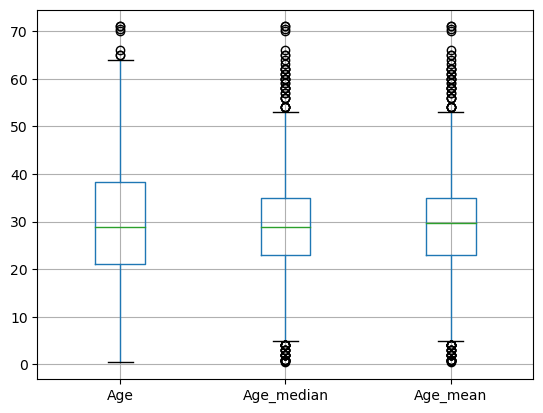

In [40]:
X_train[['Age','Age_median','Age_mean']].boxplot()

<Axes: >

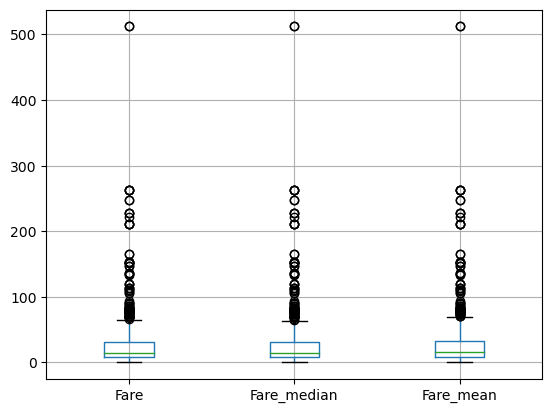

In [41]:
X_train[['Fare', 'Fare_median', 'Fare_mean']].boxplot()

# using sklearn

In [42]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [47]:
imputer1 = SimpleImputer(strategy = 'median')
imputer2 = SimpleImputer(strategy = 'mean')

In [49]:
trf = ColumnTransformer([
    ('imputer1',imputer1,['Age']),
    ('imputer2',imputer2,['Fare']) 
],remainder = 'passthrough')

In [50]:
trf.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('imputer1', SimpleImputer(strategy='median'),
                                 ['Age']),
                                ('imputer2', SimpleImputer(), ['Fare'])])

In [51]:
trf.named_transformers_['imputer1'].statistics_


array([28.75])

In [52]:
trf.named_transformers_['imputer2'].statistics_


array([32.61759689])

In [55]:
# trf.fit_transform(X_train)

In [58]:
X_train

array([[ 40.    ,  27.7208,   0.    ],
       [  4.    ,  16.7   ,   2.    ],
       [ 47.    ,   9.    ,   0.    ],
       ...,
       [ 71.    ,  49.5042,   0.    ],
       [ 28.75  , 221.7792,   0.    ],
       [ 28.75  ,  25.925 ,   0.    ]])